## Reference
* https://github.com/vashineyu/slides_and_others/blob/master/tutorial/gpu_usage.pdf
* http://josh-tobin.com/assets/pdf/troubleshooting-deep-neural-networks-01-19.pdf
* https://www.python.org/dev/peps/pep-0008/

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
nvidia-smi

NameError: name 'nvidia' is not defined

In [3]:
import os
import keras

# Try to enable GPU (optional)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 364us/step - loss: 1.9468 - acc: 0.2945 - val_loss: 1.7807 - val_acc: 0.3731
Epoch 2/100
50000/50000 [==============================] - 15s 293us/step - loss: 1.7076 - acc: 0.3888 - val_loss: 1.7115 - val_acc: 0.3939
Epoch 3/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.6276 - acc: 0.4169 - val_loss: 1.5981 - val_acc: 0.4233
Epoch 4/100
50000/50000 [==============================] - 13s 264us/step - loss: 1.5605 - acc: 0.4445 - val_loss: 1.5462 - val_acc: 0.4512
Epoch 5/100
50000/50000 [==============================] - 13s 268us/step - loss: 1.5089 - acc: 0.4620 - val_loss: 1.5324 - val_acc: 0.4608
Epoch 6/100
50000/50000 [==============================] - 13s 266us/step - loss: 1.4749 - acc: 0.4747 - val_loss: 1.5175 - val_acc: 0.4605
Epoch 7/100
50000/50000 [==============================] - 12s 240us/step - loss: 1.4448 - acc: 0.4865 - val_l

Epoch 59/100
50000/50000 [==============================] - 13s 253us/step - loss: 0.5464 - acc: 0.8052 - val_loss: 1.9504 - val_acc: 0.5181
Epoch 60/100
50000/50000 [==============================] - 13s 267us/step - loss: 0.5406 - acc: 0.8076 - val_loss: 1.9964 - val_acc: 0.5092
Epoch 61/100
50000/50000 [==============================] - 13s 267us/step - loss: 0.5250 - acc: 0.8122 - val_loss: 1.9956 - val_acc: 0.5073
Epoch 62/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.5199 - acc: 0.8137 - val_loss: 2.0660 - val_acc: 0.5071
Epoch 63/100
50000/50000 [==============================] - 13s 260us/step - loss: 0.5059 - acc: 0.8188 - val_loss: 2.0900 - val_acc: 0.5053
Epoch 64/100
50000/50000 [==============================] - 12s 234us/step - loss: 0.4989 - acc: 0.8209 - val_loss: 2.1209 - val_acc: 0.5124
Epoch 65/100
50000/50000 [==============================] - 12s 234us/step - loss: 0.4788 - acc: 0.8295 - val_loss: 2.1695 - val_acc: 0.5134
Epoch 66/100


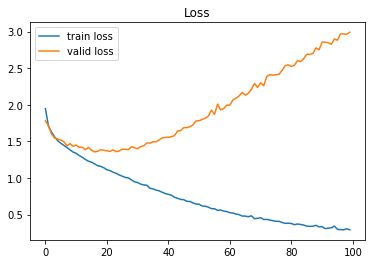

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()



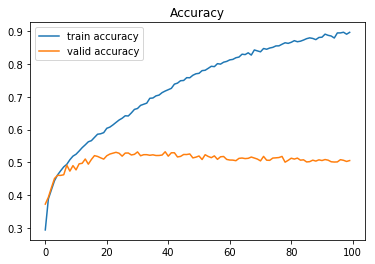

In [14]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()